# Mortality Data Documentation for County Level 2017

## Importing Packages

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

## Reading Data

In [2]:
mortality_c=pd.read_csv('/Users/sumeetmishra/desktop/CNS/CDCMortality/Data/NCHS_-_Drug_Poisoning_Mortality_by_County__United_States_2017.csv')
mortality_c.head(15)

,FIPS,Year,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Urban/Rural Category,Census Division
0,1001,2003,Alabama,1,"Autauga County, AL","46,800",6.752270,1.532372,4.394907,10.370797,Medium Metro,6
1,1001,2004,Alabama,1,"Autauga County, AL","48,366",6.948645,1.449189,4.644302,10.302841,Medium Metro,6
2,1001,2005,Alabama,1,"Autauga County, AL","49,676",6.587989,1.376595,4.399895,9.774890,Medium Metro,6
3,1001,2006,Alabama,1,"Autauga County, AL","51,328",8.454333,1.725717,5.693863,12.433080,Medium Metro,6
4,1001,2007,Alabama,1,"Autauga County, AL","52,405",8.758229,1.777117,5.905313,12.845982,Medium Metro,6
5,1001,2008,Alabama,1,"Autauga County, AL","53,277",8.898952,1.799995,6.006984,13.037172,Medium Metro,6
6,1001,2009,Alabama,1,"Autauga County, AL","54,135",8.365760,1.699744,5.638495,12.276923,Medium Metro,6
7,1001,2010,Alabama,1,"Autauga County, AL","54,571",8.915972,1.798671,6.023665,13.048786,Medium Metro,6
8,1001,2011,Alabama,1,"Autauga County, AL","55,199",10.425612,2.064963,7.087315,15.153061,Medium Metro,6
9,1001,2012,Alabama,1,"Autauga County, AL","54,927",8.682151,1.754697,5.860581,12.713738,Medium Metro,6


## Looking at Data types

In [3]:
mortality_c.dtypes

FIPS                        int64
Year                        int64
State                      object
FIPS State                  int64
County                     object
Population                 object
Model-based Death Rate    float64
Standard Deviation        float64
Lower Confidence Limit    float64
Upper Confidence Limit    float64
Urban/Rural Category       object
Census Division             int64
dtype: object

## Cleaning data and changing data types

In [4]:
mortality_c['Population'] = mortality_c['Population'].str.replace(',','').astype(int)
mortality_c.head()

mortality_c = mortality_c.convert_objects(convert_numeric=True)
mortality_c.dtypes

/Users/sumeetmishra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


FIPS                        int64
Year                        int64
State                      object
FIPS State                  int64
County                     object
Population                  int64
Model-based Death Rate    float64
Standard Deviation        float64
Lower Confidence Limit    float64
Upper Confidence Limit    float64
Urban/Rural Category       object
Census Division             int64
dtype: object

## Looking at the modified data

In [5]:
mortality_c.head(15)

,FIPS,Year,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Urban/Rural Category,Census Division
0,1001,2003,Alabama,1,"Autauga County, AL",46800,6.752270,1.532372,4.394907,10.370797,Medium Metro,6
1,1001,2004,Alabama,1,"Autauga County, AL",48366,6.948645,1.449189,4.644302,10.302841,Medium Metro,6
2,1001,2005,Alabama,1,"Autauga County, AL",49676,6.587989,1.376595,4.399895,9.774890,Medium Metro,6
3,1001,2006,Alabama,1,"Autauga County, AL",51328,8.454333,1.725717,5.693863,12.433080,Medium Metro,6
4,1001,2007,Alabama,1,"Autauga County, AL",52405,8.758229,1.777117,5.905313,12.845982,Medium Metro,6
5,1001,2008,Alabama,1,"Autauga County, AL",53277,8.898952,1.799995,6.006984,13.037172,Medium Metro,6
6,1001,2009,Alabama,1,"Autauga County, AL",54135,8.365760,1.699744,5.638495,12.276923,Medium Metro,6
7,1001,2010,Alabama,1,"Autauga County, AL",54571,8.915972,1.798671,6.023665,13.048786,Medium Metro,6
8,1001,2011,Alabama,1,"Autauga County, AL",55199,10.425612,2.064963,7.087315,15.153061,Medium Metro,6
9,1001,2012,Alabama,1,"Autauga County, AL",54927,8.682151,1.754697,5.860581,12.713738,Medium Metro,6


## Plotting histogram for FIPS(different for each county)

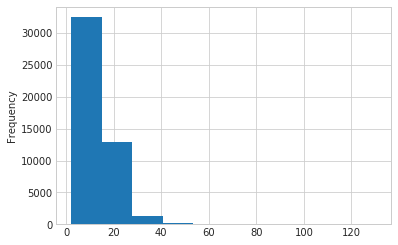

In [6]:
#mortality_c.FIPS.plot.hist()
mortality_c['Model-based Death Rate'].plot.hist()

## Checking if any missing values

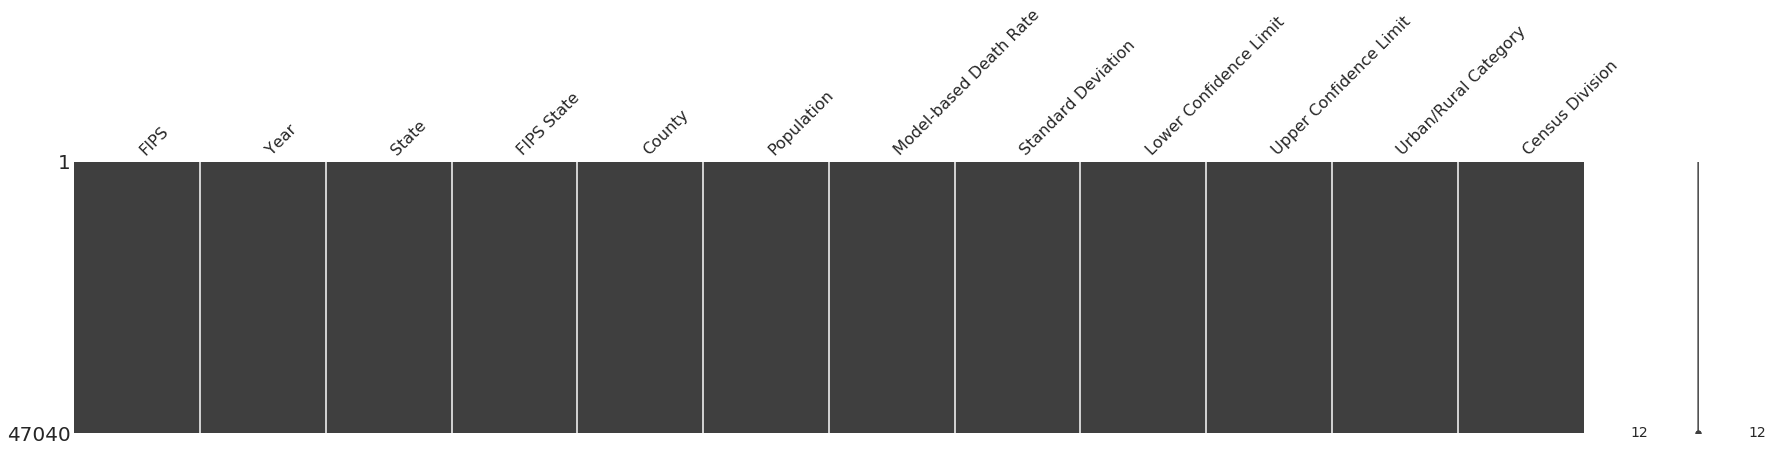

In [7]:
missingno.matrix(mortality_c, figsize = (30,5))

## Data Exploration-Univariate

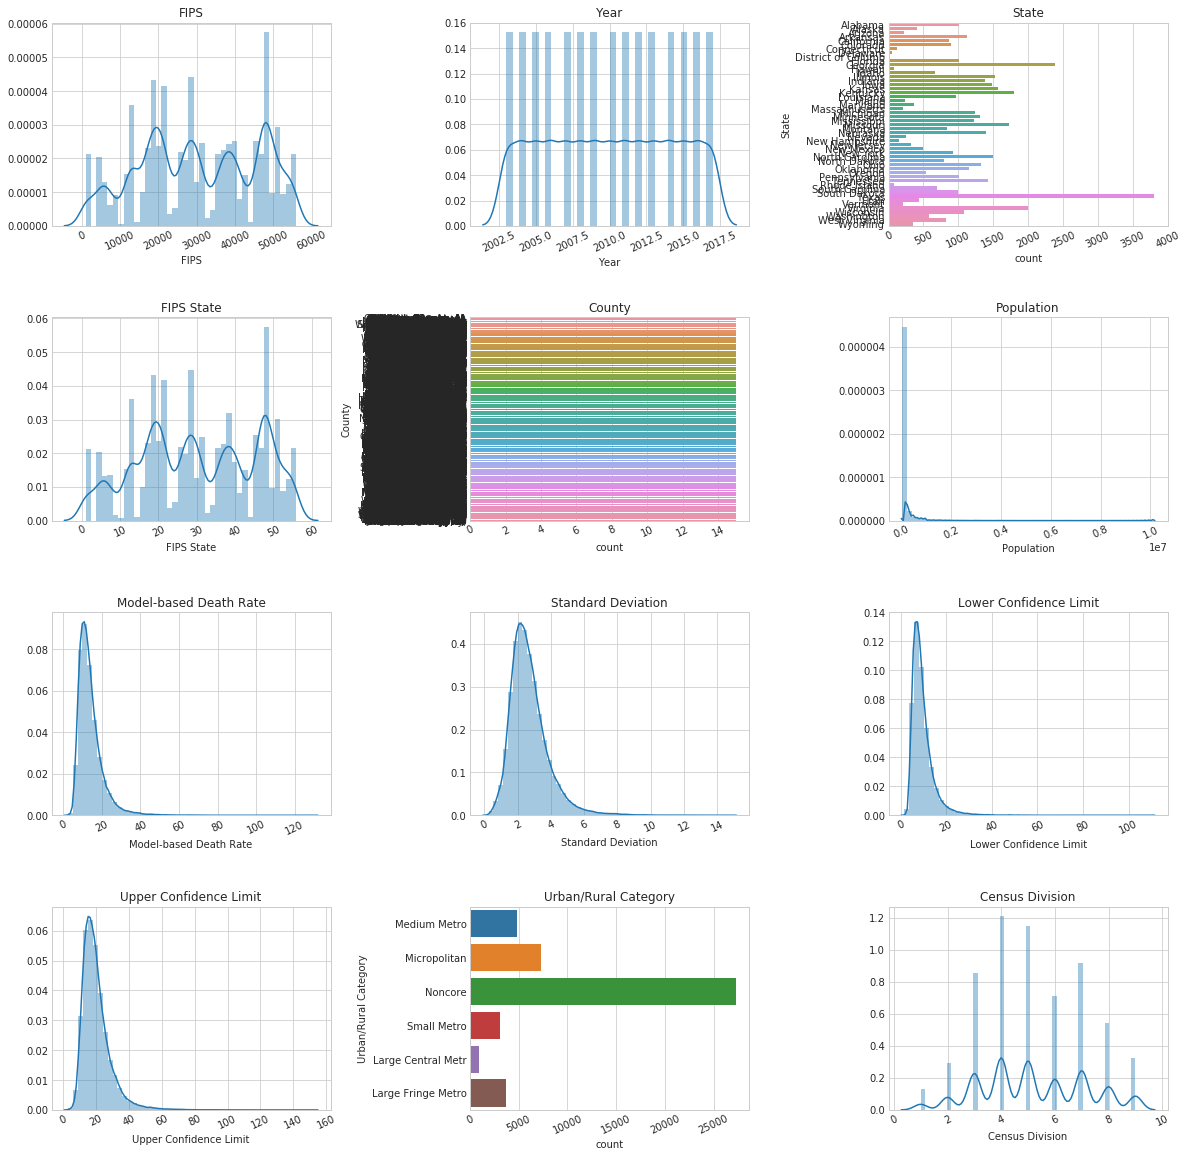

In [8]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(mortality_c, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Checking if any Null values in data

In [9]:
mortality_c.isnull().sum()

FIPS                      0
Year                      0
State                     0
FIPS State                0
County                    0
Population                0
Model-based Death Rate    0
Standard Deviation        0
Lower Confidence Limit    0
Upper Confidence Limit    0
Urban/Rural Category      0
Census Division           0
dtype: int64

## Data Description

In [10]:
mortality_c.describe()

,FIPS,Year,FIPS State,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Census Division
count,47040.000000,47040.00000,47040.000000,4.704000e+04,47040.000000,47040.000000,47040.000000,47040.000000,47040.000000
mean,30430.185587,2010.00000,30.326531,9.839124e+04,13.867272,2.693945,9.550935,20.070269,5.186543
std,15136.848946,4.32054,15.118736,3.164251e+05,6.467371,1.153782,4.907126,8.744893,1.960721
min,1001.000000,2003.00000,1.000000,5.500000e+01,2.241297,0.254160,1.599365,3.081879,1.000000
25%,19002.500000,2006.00000,19.000000,1.106100e+04,9.716813,1.932554,6.498547,14.361094,4.000000
50%,29182.000000,2010.00000,29.000000,2.559500e+04,12.430067,2.493373,8.380492,18.269794,5.000000
75%,45083.500000,2014.00000,45.000000,6.617125e+04,16.207908,3.215739,11.131992,23.497729,7.000000
max,56045.000000,2017.00000,56.000000,1.016351e+07,130.247391,14.803818,110.232284,152.549195,9.000000


## Looking at statewise count data

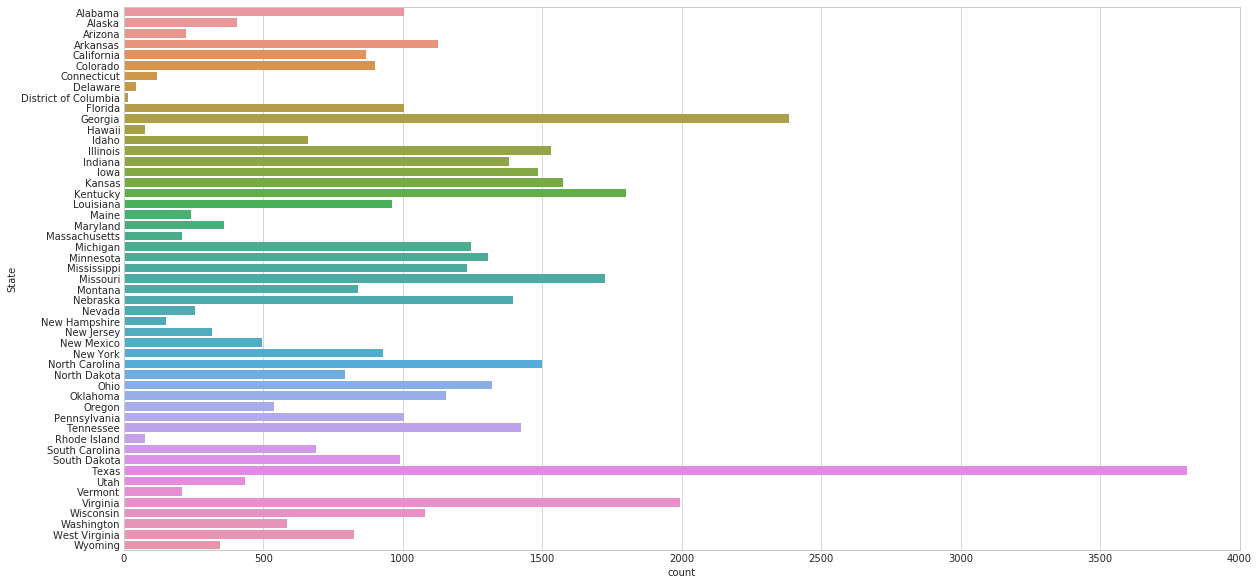

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="State", data=mortality_c)

## Looking at countywise population

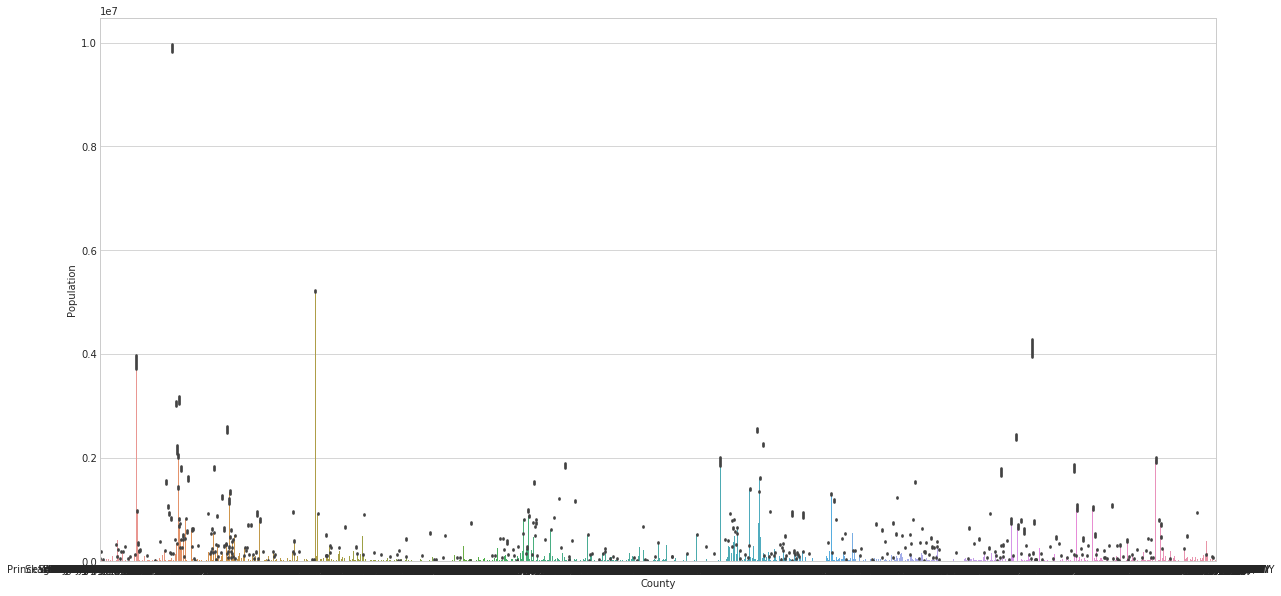

In [12]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.barplot(y="Population",x="County", data=mortality_c)

## Making and downloading Median of Model-based death Rate for each year

In [15]:
median_mbdr=mortality_c.groupby('Year').agg({'Model-based Death Rate':'median'})
median_mbdr.head(15)
#median_mbdr.to_csv('/Users/sumeetmishra/Desktop/CNS/CDCMortality/Data/CDC_mortality_median.csv')

,Model-based Death Rate
Year,
2003,8.379193
2004,8.889803
2005,9.561684
2006,10.768512
2007,11.318611
2008,11.557463
2009,11.809159
2010,12.167671
2011,12.997858
